In [2]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import string
import re
from wordcloud import WordCloud

In [3]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package vader_lexicon to C:\Users\SAKSHI
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to C:\Users\SAKSHI
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to C:\Users\SAKSHI
[nltk_data]     SHARMA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [71]:
url = 'https://www.indiewire.com/criticism/movies/animal-review-sandeep-reddy-vanga-1234931508/'
response = requests.get(url)

In [72]:
if response.status_code == 200:
    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')

In [73]:
text_elements = soup.find_all(['p', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6'])


In [74]:
extracted_text = ' '.join(element.get_text() for element in text_elements)
print( extracted_text)

By providing your information, you agree to our Terms of Use and our Privacy Policy.
				We use vendors that may also process your information to help provide our services. This site is protected by reCAPTCHA Enterprise and the Google Privacy Policy and Terms of Service apply. ‘Animal’ Review: Men Will Literally Make a 202-Minute Movie Instead of Going to Therapy Proma Khosla A little over halfway through Sandeep Reddy Vanga’s “Animal,” the main character and his allies attend church. He’s just killed 300 people, and they think he’d benefit from a spiritual cleanse, which he refuses.  After watching this film, I needed one too.  It’s not that “Animal” is particularly bad, misguided, or offensive — though it is periodically all of those things — but that it is an overall baffling cinematic experience. It is a movie with a jarring beginning and no discernible end. It is a movie where two people pilot a private plane and then have sex in the cabin while it flies itself. It is a movie tout

In [75]:
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

In [76]:
cleaned_text = clean_text(extracted_text)

In [77]:
tokens = word_tokenize(cleaned_text)

In [78]:
freq_dist = FreqDist(tokens)

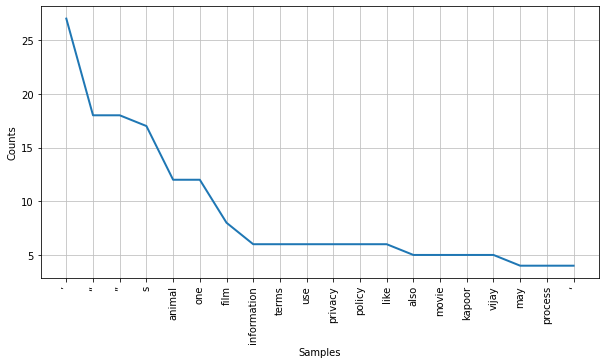

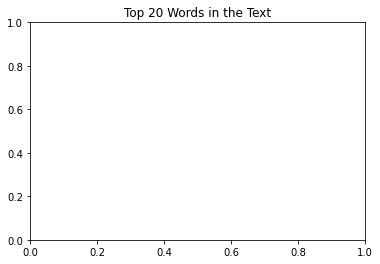

In [79]:
plt.figure(figsize=(10, 5))
freq_dist.plot(20, cumulative=False)
plt.title('Top 20 Words in the Text')
plt.show()


In [80]:
sia = SentimentIntensityAnalyzer()
sentiment_score = sia.polarity_scores(extracted_text)

print("\nSentiment Analysis:")
print(sentiment_score)


Sentiment Analysis:
{'neg': 0.13, 'neu': 0.736, 'pos': 0.134, 'compound': -0.6911}
